<a href="https://colab.research.google.com/github/saywhypablo/laba2024/blob/main/reps/rep5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Визуализация данных

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Seaborn version: {sns.__version__}")

%matplotlib inline

Saving titanic.csv to titanic (5).csv
Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0
Seaborn version: 0.13.2


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


<ipython-input-147-398638d69998>:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x1, 2/x1 + 3, color = 'red', linestyle = 'dashdot', label='x1')
<ipython-input-147-398638d69998>:11: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x2, 2/x2 + 3, color = (1.0, 0.2, 0.3), linestyle = 'solid', label='x2')


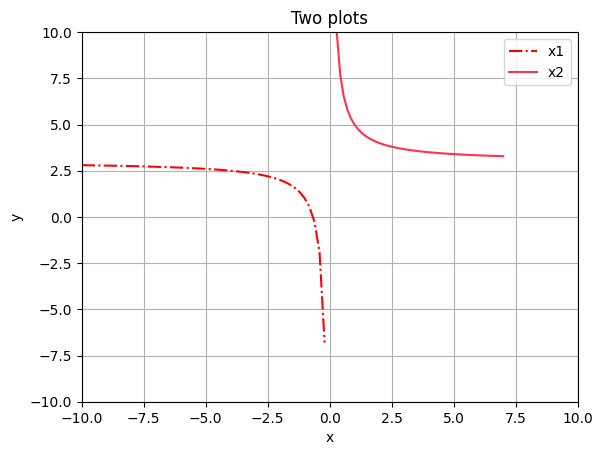

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('Two plots')
ax.set_xlabel("x")
ax.set_ylabel("y");
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
x1 = np.linspace(-10, 0)
x2 = np.linspace(0, 7)
ax.plot(x1, 2/x1 + 3, color = 'red', linestyle = 'dashdot', label='x1')
ax.plot(x2, 2/x2 + 3, color = (1.0, 0.2, 0.3), linestyle = 'solid', label='x2')
ax.legend()
ax.grid()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

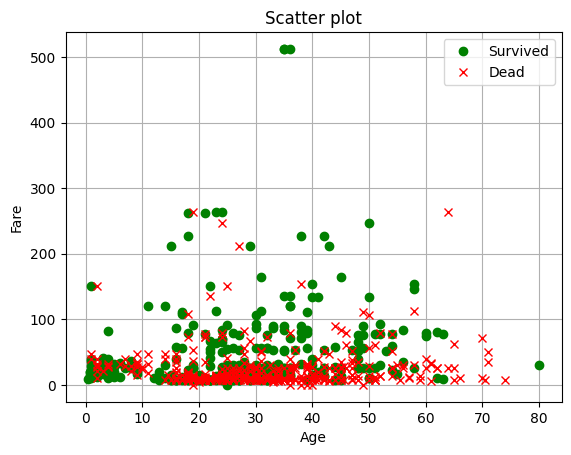

In [ ]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])
fig = plt.figure()
ax = plt.axes()
ax.set_title('Scatter plot')
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
survived = titanic_df[titanic_df['Survived'] == 1]
dead = titanic_df[titanic_df['Survived'] == 0]
plt.plot(survived['Age'], survived['Fare'], 'o', color = 'green', label='Survived')
plt.plot(dead['Age'], dead['Fare'], 'x', color = 'red', label='Dead')
ax.legend()
ax.grid()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

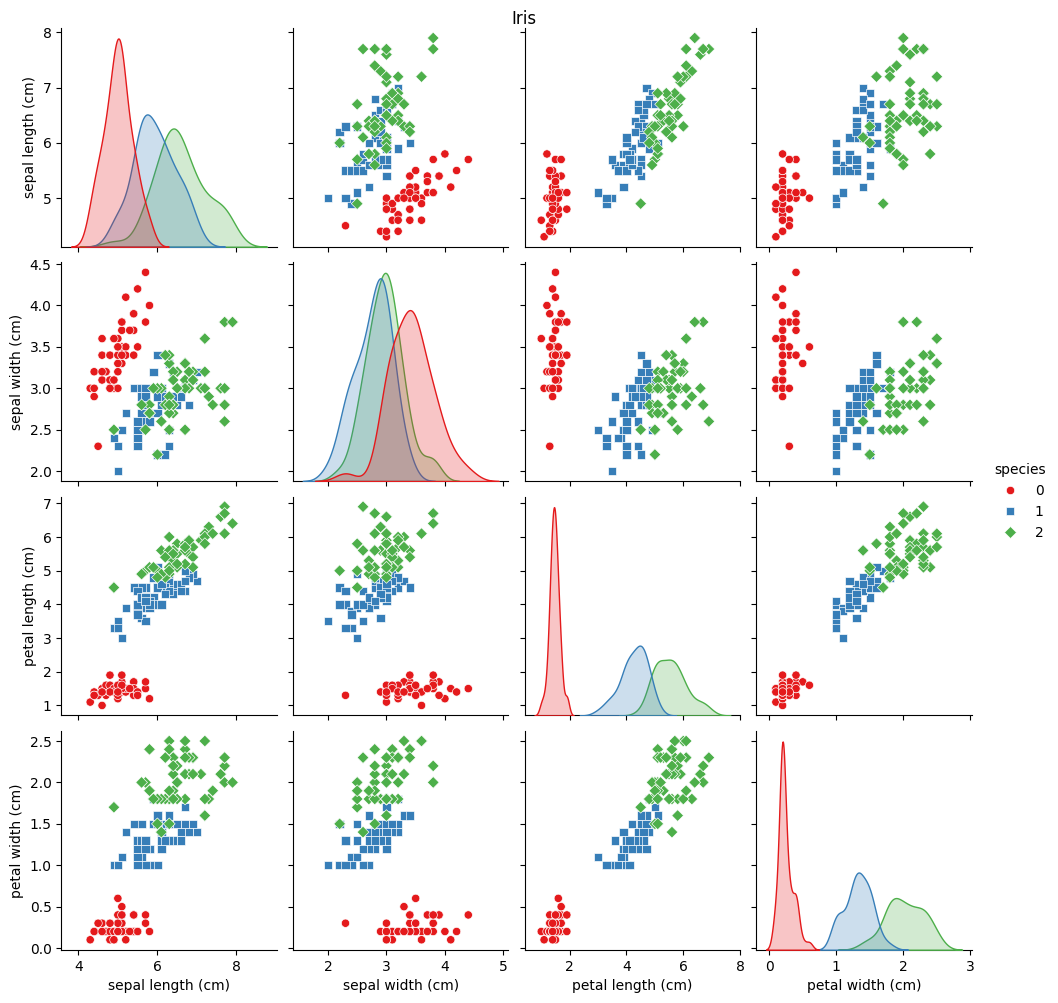

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
sns.pairplot(iris_df, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle("Iris", y=1)
plt.show()

Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

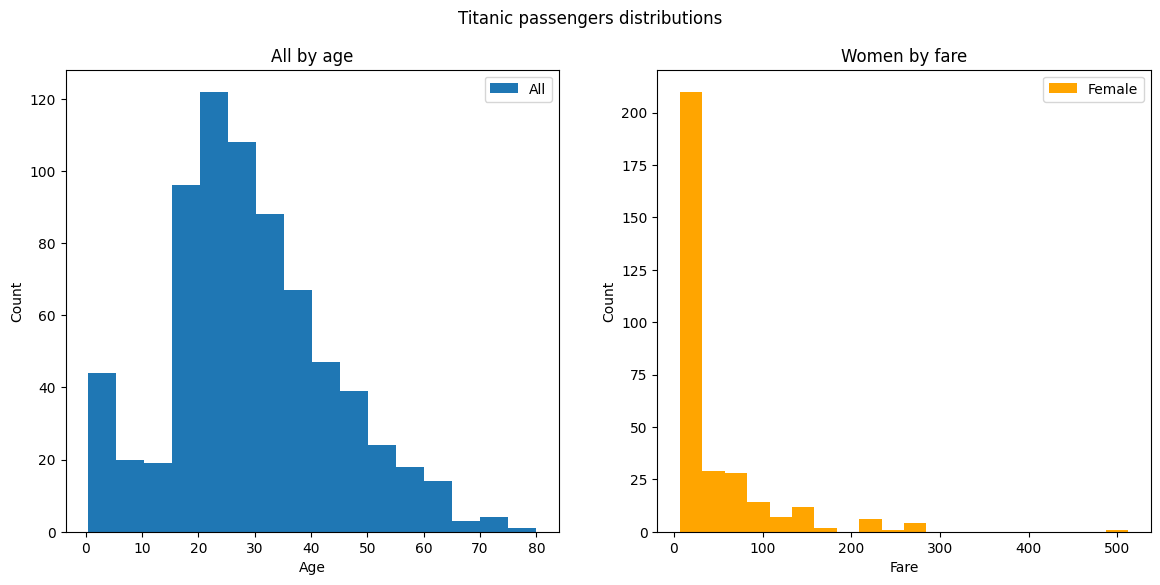

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Titanic passengers distributions")
axes[0].hist(titanic_df['Age'], bins = 16, label='All')
axes[0].set_title("All by age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
female = titanic_df[titanic_df['Sex'] == 'female']
axes[1].hist(female['Fare'], bins=20, color='orange', label='Female')
axes[1].set_title("Women by fare")
axes[1].set_xlabel("Fare")
axes[1].set_ylabel("Count")
axes[0].legend()
axes[1].legend()
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

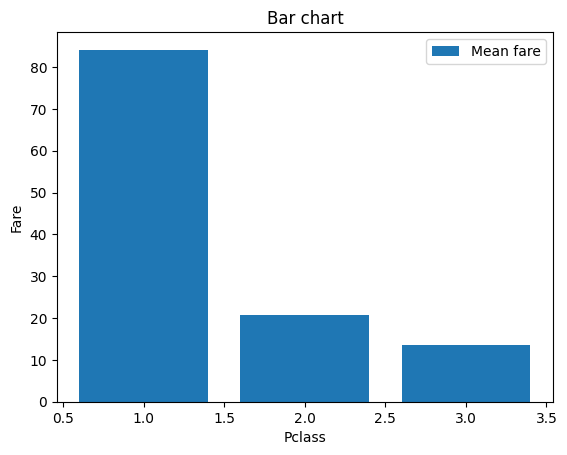

In [ ]:
titanic_df = pd.read_csv("titanic.csv")
grouped = titanic_df.groupby('Pclass')['Fare'].mean()
plt.bar(grouped.index, grouped.values, label = "Mean fare")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.title("Bar chart")
plt.legend()
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

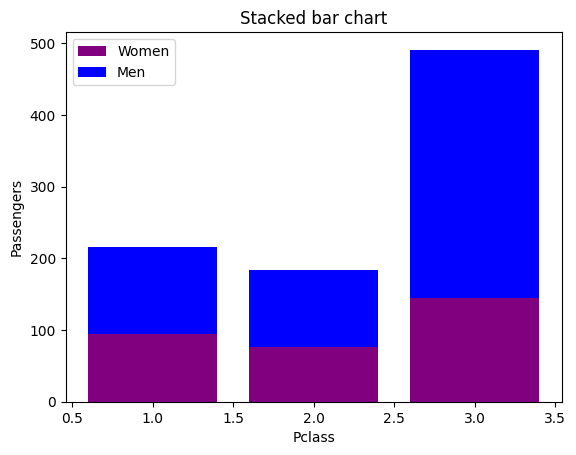

In [ ]:
titanic_df = pd.read_csv("titanic.csv")
women = titanic_df[titanic_df['Sex'] == 'female']['Pclass'].value_counts()
men = titanic_df[titanic_df['Sex'] == 'male']['Pclass'].value_counts()
plt.bar(women.index, women, label="Women", color="purple")
plt.bar(men.index, men, bottom=women, label="Men", color="blue")
plt.xlabel("Pclass")
plt.ylabel("Passengers")
plt.title("Stacked bar chart")
plt.legend()
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

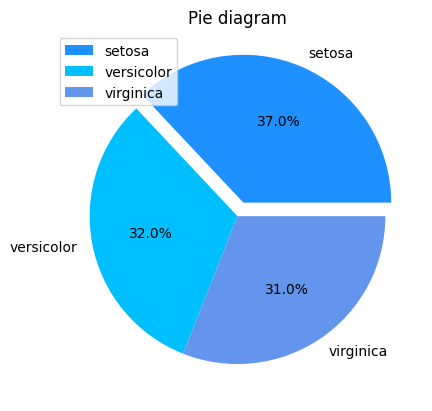

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
target_series = pd.Series(iris.target)
freq_table = target_series.sample(100, random_state = 42).value_counts()
plt.pie(
    freq_table,
    labels=[iris.target_names[i] for i in freq_table.index],
    colors=["dodgerblue", "deepskyblue", "cornflowerblue"],
    autopct="%.1f%%",
    explode=[0.1, 0, 0]
    )
plt.title("Pie diagram")
plt.legend()
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

<Axes: xlabel='Age', ylabel='Count'>

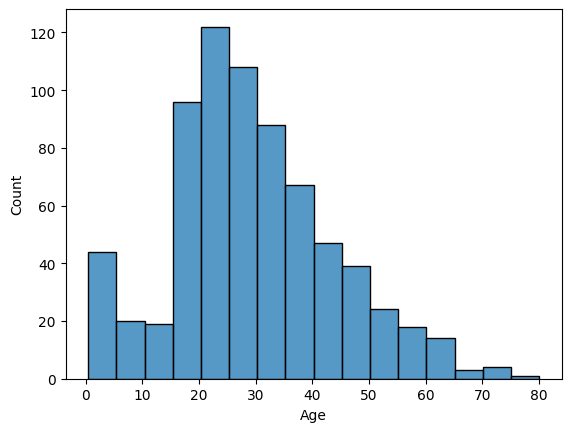

In [ ]:
sns.histplot(titanic_df['Age'], bins = 16)

## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.